In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Deep Learning Framework를 사용하지 않고 native하게 코딩해보기
X = list(range(10))
Y = [3, 5, 7, 1, 4, 70, 3, 55, 0, 27]
# print(len(Y))     # X과 값과 Y 값의 갯수가 맞는지 확인을 위함

print(X)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


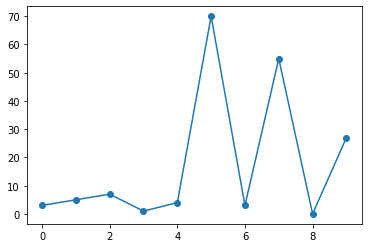

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X, Y)      # plot: 선으로 그래프 생성  # X, Y를 그래프로 그리겠다.   https://matplotlib.org/   visualizing을 도와주는 라이브러리
plt.scatter(X, Y)   # Scatter: 점으로 값을 찍어줌

# h(5, 3)   # jupyter notebook은 편의상 마지막 코드는 출력해줌.

In [15]:
# hypothesis
class H():
    def __init__(self, w):              # w를 입력으로 받음, initializing
        self.w = w                      # w 저장
    
    def forward(self, x):               # pytorch에서는 H(x)를 통과시킬때 forward() 함수를 사용
        return self.w*x

# cost
def cost(h, X, Y):
    error = 0
    for i in range(len(X)):
        error += (h.forward(X[i]) - Y[i])**2        # ???

        # print(h.forward(X[i]))      # X*h(4)
        # print("error",i,": ", error)
        # print(X[i], Y[i])
        
        error = error / len(X)          # 평균을 내기 위함
    return error

h = H(4)                                # 4가 class H안으로 들어가 w에 저장
# print(h, w)
cost(h, X, Y)

19.1382561119

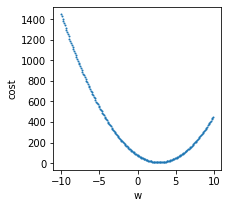

In [ ]:
list_w = []                                     # 그래프로 만들기 위해 리스트에 값을 넣기
list_c = []
for i in range(-100, 100):                      # hypothesis
    w = i * 0.1
    h = H(w)
    c = cost(h, X, Y)
    list_w.append(w)
    list_c.append(c)
    # print(list_w)
    # print(list_c)

plt.figure(figsize=(3, 3))                      # Set Figure size
plt.xlabel('w')
plt.ylabel('cost')
# plt.plot(list_w, list_c)                      # 연구 결과 보고를 위해 중요한 visualize
plt.scatter(list_w, list_c, s=1)                # x, y의 값의 수가 같지 않으면 에러남. 's=1'은 marker size 조정

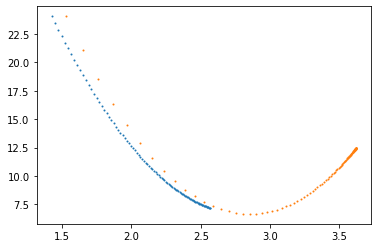

In [20]:
# Gradient
def cal_grad(w, cost):
    h = H(w)
    cost1 = cost(h, X, Y)

    eps = 0.001
    h = H(w+eps)
    cost2 = cost(h, X, Y)

    dcost = cost2 - cost1
    dw = eps
    grad = dcost / dw
    return grad, (cost1+cost2)*0.5

def cal_grad2(w, cost):             # 수학적으로 Gradient를 구해보자
    h = H(w)
    grad = 0
    for i in range(len(X)):
        # grad += h.forward(X[i] - Y[i]) * X[i]
        grad += 2 * (h.forward(X[i]) - Y[i]) *X[i]

    grad = grad / len(X)
    c = cost(h, X, Y)

    return grad, c


w1 = 1.4
w2 = 1.4
lr = 0.001
# print(cal_grad(4, cost))
# w = w + lr * (-cal_grad(4, cost))
# print(w)

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100):
    # w = w + lr * (-cal_grad(w, cost))
    grad, mean_cost = cal_grad(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)
    # print(grad, '\t', grad2)

    # w -= lr * cal_grad(w, cost)
    w1 -= lr * grad
    w2 -= lr * grad2

    list_w1.append(w1)
    list_c1.append(mean_cost)
    list_w2.append(w2)
    list_c2.append(mean_cost2)

    # print(w1,'\t',mean_cost, '\t', w2, '\t', mean_cost2)

plt.scatter(list_w1, list_c1, s=1)
plt.scatter(list_w2, list_c2, s=1)